# SQL using Jupyter

## Research info: 
Coronavirus took the world by surprise, changing the usual order of things. For a while, city residents stopped going outdoors, visiting cafes and shopping centres. But there was more time for books. Startups noticed this and rushed to create apps for those who like to read.  

The company decided to be on the wave and bought a large subscription-based book reading service.  
The first task is to analyse the database. It contains information about books, publishers, authors, and user reviews of books.  

Using the available data, it is necessary to formulate a valuable offer for the new product.

## Tasks
1. Count how many books were published after 1 January 2000,  
2. For each book, count the number of reviews and the average rating,  
3. Identify the publisher that has published the largest number of books thicker than 50 pages - so you can exclude brochures from the analysis,  
4. identify the author with the highest average rating of books - only books with 50 or more ratings should be considered,  
5. calculate the average number of reviews from users who gave more than 48 ratings.

## Data description
Table `**books**`.  
Contains data about books:  
- book_id - book identifier;  
- author_id - author identifier;  
- title - book title;  
- num_pages - number of pages;  
- publication_date - publication date of the book;  
- publisher_id - publisher identifier.  
  
Table `**authors**`.  
Contains data about authors:  
- author_id - author identifier;  
- author - author's name.  
  
Table `**publishers**`  
Contains data about publishers:  
- publisher_id - publisher identifier;  
- publisher - name of the publisher;  
  
Table `**ratings**`  
Contains data about user ratings of books:  
- rating_id - rating identifier;  
- book_id - book identifier;  
- username - name of the user who left the rating;  
- rating - rating of the book.  
  
Table `**reviews**`  
Contains data about user reviews:  
- review_id - review identifier;  
- book_id - book identifier;  
- username - review author's name;  
- text - review text.  

Data base structure:
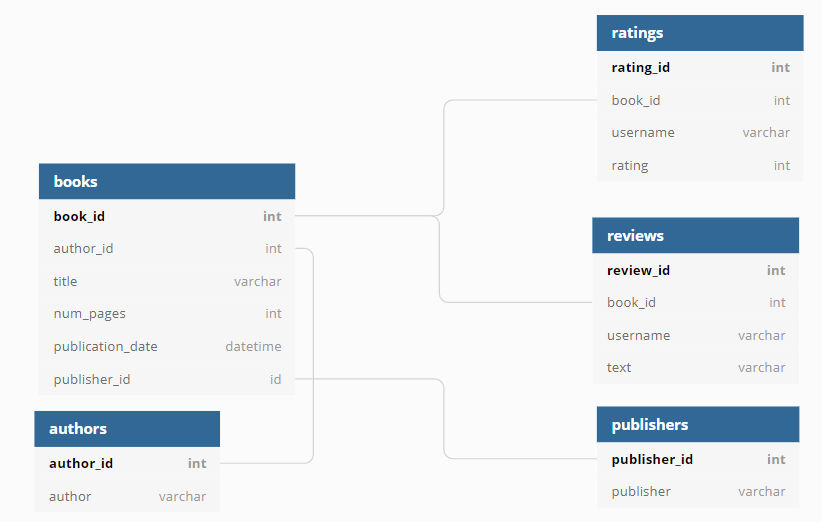

## Performance

### Technical actions:

In [22]:
# import libraries
import pandas as pd
from sqlalchemy import text, create_engine

# set parameters
db_config = {'user': 'praktikum_student', # username
'pwd': 'Sdf4$2;d-d30pp', # password
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # connection port
'db': 'data-analyst-final-project-db'} # database name
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# saving connector
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
con=engine.connect()


### Looking at the tables:

In [23]:
# To execute an SQL query, use Pandas
query = '''SELECT * FROM books'''
books = pd.io.sql.read_sql(sql=text(query), con = con)
books.head()

book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268

In [24]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [25]:
query = '''SELECT * FROM authors'''
authors = pd.io.sql.read_sql(sql=text(query), con = con)
authors.head()

author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Lloyd

In [26]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [27]:
query = '''SELECT * FROM publishers'''
publishers = pd.io.sql.read_sql(sql=text(query), con = con)
publishers.head()

publisher_id                          publisher
0             1                                Ace
1             2                           Ace Book
2             3                          Ace Books
3             4                      Ace Hardcover
4             5  Addison Wesley Publishing Company

In [28]:
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [29]:
query = '''SELECT * FROM ratings'''
ratings = pd.io.sql.read_sql(sql=text(query), con = con)
ratings.head()

rating_id  book_id       username  rating
0          1        1     ryanfranco       4
1          2        1  grantpatricia       2
2          3        1   brandtandrea       5
3          4        2       lorichen       3
4          5        2    mariokeller       2

In [30]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [31]:
query = '''SELECT * FROM reviews'''
reviews = pd.io.sql.read_sql(sql=text(query), con = con)
reviews.head()

review_id  book_id       username  \
0          1        1   brandtandrea   
1          2        1     ryanfranco   
2          3        2       lorichen   
3          4        3  johnsonamanda   
4          5        3    scotttamara   

                                                text  
0  Mention society tell send professor analysis. ...  
1  Foot glass pretty audience hit themselves. Amo...  
2  Listen treat keep worry. Miss husband tax but ...  
3  Finally month interesting blue could nature cu...  
4  Nation purpose heavy give wait song will. List...

In [32]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


### Compliting tasks:

#### Count how many books were published after 1 January 2000 

In [33]:
query1 = '''
SELECT COUNT(*)
FROM books
WHERE publication_date > '2000-01-01'
'''

q1 = pd.io.sql.read_sql(sql=text(query1), con = con)
q1 = q1.loc[0, 'count']
print('Books published after 1 January 2000:', q1)

Books published after 1 January 2000: 819


**Summary:**  
The number of books was calculated with a simple COUNT query and limited the term with the WHERE method.

#### For each book, count the number of reviews and the average rating.

In [34]:
query2 = '''
SELECT 
    b.title AS book_title,
    rat.avg, 
    rev.count
FROM books b
LEFT JOIN (
    SELECT book_id, AVG(rating) 
    FROM ratings
    GROUP BY book_id) rat
    ON b.book_id = rat.book_id
LEFT JOIN (SELECT book_id, COUNT(*) 
    FROM reviews
    GROUP BY book_id) rev
    ON b.book_id = rev.book_id

ORDER BY rat.avg DESC


'''

q2 = pd.io.sql.read_sql(sql=text(query2), con = con)
q2

book_title   avg  count
0                 Pop Goes the Weasel (Alex Cross  #5)  5.00    2.0
1    The Ghost Map: The Story of London's Most Terr...  5.00    2.0
2    In the Hand of the Goddess (Song of the Liones...  5.00    2.0
3                             Tai-Pan (Asian Saga  #2)  5.00    2.0
4    How to Be a Domestic Goddess: Baking and the A...  5.00    1.0
..                                                 ...   ...    ...
995  The World Is Flat: A Brief History of the Twen...  2.25    3.0
996                                              Junky  2.00    2.0
997                  His Excellency: George Washington  2.00    2.0
998                                      Drowning Ruth  2.00    3.0
999                               Harvesting the Heart  1.50    2.0

[1000 rows x 3 columns]

**Summary:**  
The number of reviews and average rating are calculated using LEFT JOIN of ratings and reviews tables to books and AVG and COUNT methods.  
The number of reviews is different, min rating is 1.5, max rating is 5.0.

#### Identify the publisher that has published the largest number of books thicker than 50 pages (exclude brochures from the analysis).

In [35]:
query3 = '''
SELECT 
    publisher, COUNT(*)
FROM books b
LEFT JOIN publishers p ON b.publisher_id =  p.publisher_id
WHERE num_pages > 50
GROUP BY p.publisher
ORDER BY COUNT(*) DESC
LIMIT 1

'''

q3 = pd.io.sql.read_sql(sql=text(query3), con = con)
q3 = q3.loc[0, 'count']
print('Penguin Books has released a record-breaking', q3, 'books (excluding brochures).')

Penguin Books has released a record-breaking 42 books (excluding brochures).


**Summary:**  
To determine the publisher, we merged the books and publishers tables, then restricted the thickness of books using WHERE method and selected the first value from the list using descending sorting.

#### Identify the author with the highest average book rating - only consider books with 50 or more ratings

In [36]:
query4 = '''
SELECT 
    a.author, ROUND(AVG(rat.rating),1) avg_rating
FROM authors a
JOIN books b ON a.author_id =  b.author_id
JOIN ratings rat ON rat.book_id = b.book_id
WHERE rat.book_id IN(
    SELECT book_id
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(rating) >= 50)
GROUP BY a.author_id
ORDER BY AVG(rat.rating) DESC
 LIMIT 1

'''

q4 = pd.io.sql.read_sql(sql=text(query4), con = con)
q4
q4_1 = q4.loc[0, 'avg_rating']
q4_2 = q4.loc[0, 'author']
print('Author with the highest average rating (' + str(q4_1) + '): ' + str(q4_2))

Author with the highest average rating (4.3): J.K. Rowling/Mary GrandPré


**Summary:**  
The author search is performed with the help of a subquery, using the grouping of books with the condition of the number of ratings greater than 50. Then by combining authors, books and ratings tables, we search for the author with the maximum available average rating among the books from the subquery.

#### Count the average number of reviews from users who have given more than 48 ratings

In [37]:
query5 = '''
SELECT AVG(count)
FROM 
    (SELECT username,
    COUNT(review_id)
    FROM reviews
    GROUP BY username
    HAVING username IN (
        SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) > 48)) AS rat_cnt


'''

q5 = pd.io.sql.read_sql(sql=text(query5), con = con)
q5 = q5.loc[0, 'avg']
print('Average number of reviews from users with more than 48 ratings:', q5)

Average number of reviews from users with more than 48 ratings: 24.0


**Summary:**  
The average number of reviews is calculated using a query from the reviews table with a subquery for the number of ratings greater than 48 from the ratings table.

## General summary:  
Using the results of the study, the following interesting observations can be brought out to create a new book reading app:  
- Publish more books as our app has only 819 books since 2000, this is very few. If we have coronavirus times, it turns out that 819 books have been published in almost 20 years.  
- keep in mind the ability to review and rate books, it's good practice and very helpful to have lots of reviews to see if a potential reader will like a book,  
- look out for popular publishers who have a lot of books and they are highly rated, this will bring in more profit. However, do not forget about smaller ones, because for every book there will be a fan, this will help to get more users,  
- be sure to have books by the most popular authors in the database, also for profit and a large number of users,  
- ask readers in the app to rate the books they read, give bonuses or something like that, as reviews and ratings are great. However, in my opinion, a simple evaluation is not very informative, competitors do not sleep, so it is better to allow the evaluation with a comment, then there is a greater likelihood of a true evaluation, but this can then be investigated further.